<a href="https://colab.research.google.com/github/booorayan/BluecarsAuto/blob/master/Autolib_projecte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing Project

## Defining the Question 

### Hypothesis

### Context

### Metrics for Success

### Experimental Design

### Appropriateness of Data Provided

## Importing libraries to be used

In [0]:
# pandas allows us to organize data in table form
import pandas as pd

# nummpy will enable us to work with multidimensional arrays
import numpy as np

# matplotlib will help in visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline  

# seaborn will also help in data visualization
import seaborn as sns
sns.set()  #(Re)set the seaborn default

# pandas profiling provides a summary report, including descriptive statistics of the dataset 
import pandas_profiling as pp


## Loading and previewing the dataset

In [39]:
# loading the dataset and previewing the first 5 observations 
url = 'http://bit.ly/DSCoreAutolibDataset'

autoe = pd.read_csv(url)
autoe.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [40]:
# reading the columns of the dataframe
autoe.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [41]:
# loading the dictionary and reading the description of columns in the dataset
dlink = 'http://bit.ly/DSCoreAutolibDatasetGlossary'

dic = pd.read_excel(dlink)
dic


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [42]:
# checking the number of rows and columns in the dataframe
print('No. of rows: {} \nNo. of columns: {}'.format(autoe.shape[0], autoe.shape[1]))

# checking the no. of total observations
print('Total observations: {}'.format(autoe.size))

# autoe dataframe has 16,085 rows and 13 columns
# dataframe has a total of 209,105 observations


No. of rows: 16085 
No. of columns: 13
Total observations: 209105


In [43]:
# checking the datatype of the columns 
autoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## Data Cleaning

In [0]:
# creating a copy of the dataframe to work on
autoel = autoe.copy()

In [45]:
# replacing whitespaces in the columns with underscores and converting column names to lowercase to ensure uniformity
autoel.columns = autoel.columns.str.replace(' ', '_').str.lower()

# confirming 
autoel.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [46]:
# checking for sum of duplicate values
autoel.duplicated().sum()

# dataframe/dataset has no duplicate values

0

In [47]:
# checking for the sum of missing values in each column

autoel.isnull().sum()

# output reveals that dataframe has no missing values 

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [48]:
# checking the datatypes of the columns 

autoel.dtypes

# all but two columns in the dataframe are numerical variables

postal_code                int64
date                      object
n_daily_data_points        int64
dayofweek                  int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

In [49]:
# converting date column to datetime
autoel.date = pd.to_datetime(autoel.date)

autoel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
postal_code               16085 non-null int64
date                      16085 non-null datetime64[ns]
n_daily_data_points       16085 non-null int64
dayofweek                 16085 non-null int64
day_type                  16085 non-null object
bluecars_taken_sum        16085 non-null int64
bluecars_returned_sum     16085 non-null int64
utilib_taken_sum          16085 non-null int64
utilib_returned_sum       16085 non-null int64
utilib_14_taken_sum       16085 non-null int64
utilib_14_returned_sum    16085 non-null int64
slots_freed_sum           16085 non-null int64
slots_taken_sum           16085 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 1.6+ MB


In [50]:
autoel.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [51]:
# selecting columns where day_type = weekday because we will be working with weekdays only

autob = autoel[autoel['day_type'] == 'weekday']

# previewing the first ten observations in the resulting dataframe
autob.head(10)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20
7,75001,2018-01-08,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,2018-01-09,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,2018-01-10,1440,2,weekday,88,85,5,5,11,11,23,22
10,75001,2018-01-11,1440,3,weekday,125,125,3,4,13,13,22,22
11,75001,2018-01-12,1439,4,weekday,126,127,3,2,12,12,11,13


In [53]:
# dropping day_type column because it is constant (i.e., as weekday)
# dropping n_daily_data_points column because it is not relevant to the problem

autob = autob.drop(['day_type', 'n_daily_data_points'], 1)
autob.columns

Index(['postal_code', 'date', 'dayofweek', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
       'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

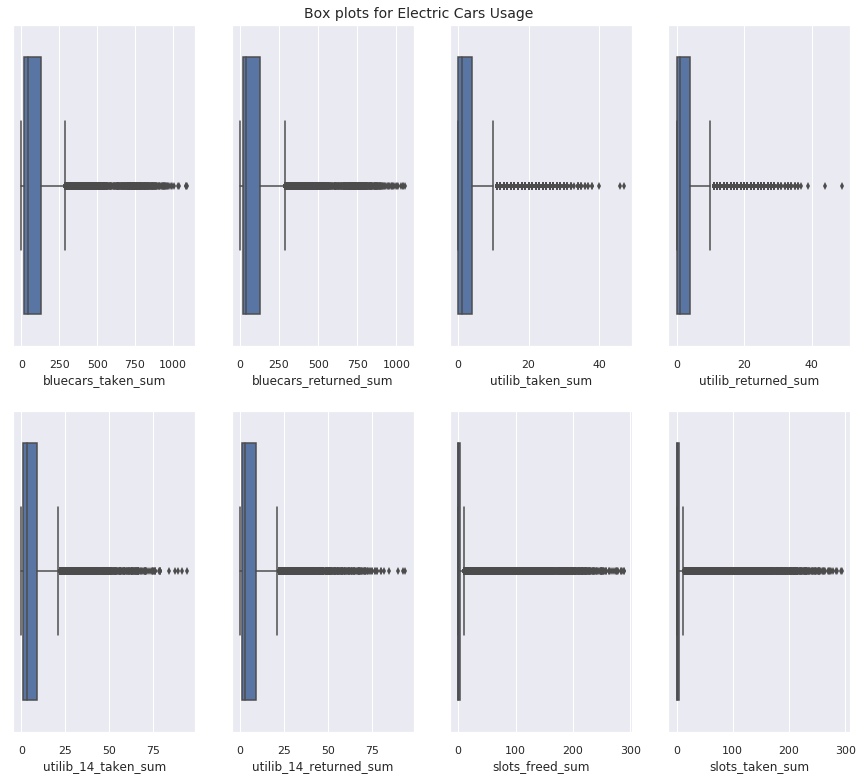

In [55]:
# checking for outliers in columns[3:]

box, axx = plt.subplots(2,4, figsize=(15,13))
box.suptitle('Box plots for Electric Cars Usage', fontsize=14, y=0.9)

for ax, column in zip(axx.flatten(), autob.columns[3:]):   
  sns.boxplot(autob[column], ax=ax)
  
# boxplots indicate presence of numerous outliers in plotted columns
# however, we will not drop outliers since they are reasonable/realistic
    

In [56]:
# removing outliers from the dataframe using IQR method

for column in autoel.columns[5:]:
  Q1 = autob[column].quantile(0.25)
  Q3 = autob[column].quantile(0.75)
  
  IQR = Q3 - Q1
  
aut = autob[~((autoel[column] < Q1 - 1.5*IQR) | (autoel[column] > Q3 + 1.5*IQR))]
aut.tail(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,postal_code,date,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
16071,95880,2018-06-06,2,12,12,0,1,0,0,0,0
16072,95880,2018-06-07,3,10,11,1,0,0,0,0,0
16073,95880,2018-06-08,4,11,9,0,0,0,0,0,0
16076,95880,2018-06-11,0,17,18,0,0,0,0,0,0
16077,95880,2018-06-12,1,25,25,0,0,0,0,0,0
16078,95880,2018-06-13,2,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,3,15,13,0,0,0,0,0,0
16080,95880,2018-06-15,4,15,10,0,0,2,3,0,0
16083,95880,2018-06-18,0,11,14,3,5,2,2,0,0
16084,95880,2018-06-19,1,2,2,2,1,0,0,0,0


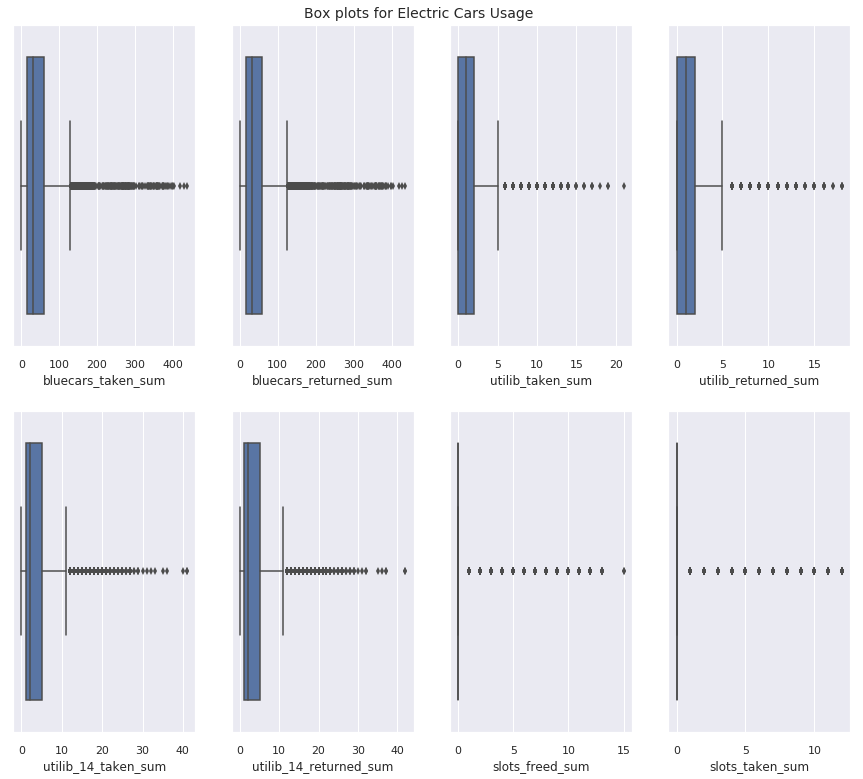

In [58]:
bx, axx = plt.subplots(2,4, figsize=(15,13))
bx.suptitle('Box plots for Electric Cars Usage', fontsize=14, y=0.9)

for ax, column in zip(axx.flatten(), aut.columns[3:]):   
  sns.boxplot(aut[column], ax=ax)

In [0]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters(np.datetime64)

In [60]:
# using pandas profiling to get a summarized report of the dataset
pp.ProfileReport(autob)

Number of variables,12
Number of observations,11544
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,6


## Exploratory Data Analysis

In [71]:
# ckecking for unique values in the postal_code column

print(autob.postal_code.unique())
print('\nNumber of unique values in postal_code column: %d' % len(autob.postal_code.unique()))

# there are 104 distinct postal codes in the postal_code column

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]

Number of unique values in postal_code column: 104


In [67]:
# checking for the sum of bluecars taken in each day of the week excluding the weekend

autob.groupby('dayofweek')[['bluecars_taken_sum']].sum().sort_values('bluecars_taken_sum', ascending=False)

# most bluecars (i.e., 288,546) are taken on Friday
# Monday and Thursday follow in second and third respectively

,bluecars_taken_sum
dayofweek,
4,288546
0,263893
3,263207
1,261940
2,261849


In [68]:
autob.groupby('dayofweek')[['bluecars_returned_sum']].sum().sort_values('bluecars_returned_sum', ascending=False)

# most bluecars (i.e., 285,029) are returned on Friday
# Monday and Thursday follow in second nd third respectively

,bluecars_returned_sum
dayofweek,
4,286029
0,264808
3,262961
2,260673
1,260470


## Data Analysis

### Univariate Analysis

#### Frequency Tables

In [62]:
# frequency table of bluecars_returned_sum column

autob['dayofweek'].value_counts()

0    2374
1    2363
4    2271
3    2268
2    2268
Name: dayofweek, dtype: int64

#### Measures of Central Tendency

In [85]:
# mean of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum & slots_taken_sum 

num_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in num_col:
  print('mean of {}: {:.2f}' .format(column, autob[column].mean()))

mean of bluecars_returned_sum: 115.64
mean of bluecars_taken_sum: 116.03
mean of slots_freed_sum: 20.95
mean of slots_taken_sum: 20.92


In [84]:
# median of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum, slots_taken_sum 

num_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in num_col:
  print('median of %s: %d' % (column, autob[column].median()))

median of bluecars_returned_sum: 42
median of bluecars_taken_sum: 42
median of slots_freed_sum: 0
median of slots_taken_sum: 0


In [86]:
# mode of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum, slots_taken_sum & of dayofweek

num_co = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum', 'dayofweek']

for column in num_co:
  print('mode of %s: %d' % (column, autob[column].mode()))
  
# day 0/Monday features the most in the dataset
# in most cases, the sum of either returned bluecars or taken bluecars was 12


mode of bluecars_returned_sum: 12
mode of bluecars_taken_sum: 12
mode of slots_freed_sum: 0
mode of slots_taken_sum: 0
mode of dayofweek: 0


#### Measures of Spread/Dispersion